In [154]:
# -*- coding: utf-8 -*-
import os, re, json 
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from textblob import TextBlob
import seaborn as sns

In [42]:
os.chdir('/Users/DonginKim/Documents/Python/Social Media/')
df = pd.read_csv('SKorea.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097 entries, 0 to 1096
Data columns (total 12 columns):
Unnamed: 0                         1097 non-null object
created_at                         1094 non-null object
id                                 1095 non-null float64
in_reply_to_status_id              69 non-null float64
place                              1 non-null object
coordinates                        1 non-null object
text                               1094 non-null object
quoted_status.entities.hashtags    223 non-null object
favorite_count                     1093 non-null float64
retweet_count                      1093 non-null float64
user.time_zone                     642 non-null object
lang                               1093 non-null object
dtypes: float64(4), object(8)
memory usage: 102.9+ KB


,Unnamed: 0,created_at,id,in_reply_to_status_id,place,coordinates,text,quoted_status.entities.hashtags,favorite_count,retweet_count,user.time_zone,lang
0,0,Thu Jun 22 20:32:28 +0000 2017,8.779877e+17,NaN,NaN,NaN,RT @HuntLifeDaily: Live from North Korea... ht...,NaN,0.0,0.0,Central Time (US & Canada),en
1,1,Thu Jun 22 20:32:29 +0000 2017,8.779877e+17,NaN,NaN,NaN,RT @HuntLifeDaily: Live from North Korea... ht...,NaN,0.0,0.0,Central Time (US & Canada),en
2,2,Thu Jun 22 20:32:29 +0000 2017,8.779877e+17,NaN,NaN,NaN,"RT @imjoy_l: In Korea, unlike Japan, moving ag...",[],0.0,0.0,NaN,en
3,3,Thu Jun 22 20:32:29 +0000 2017,8.779877e+17,NaN,NaN,NaN,"RT @BTS_co_id: [Article/Trans] Special Issue, ...",NaN,0.0,0.0,Jakarta,en
4,4,Thu Jun 22 20:32:30 +0000 2017,8.779877e+17,NaN,NaN,NaN,RT @HuntLifeDaily: Live from North Korea... ht...,NaN,0.0,0.0,Central Time (US & Canada),en


# Visualization

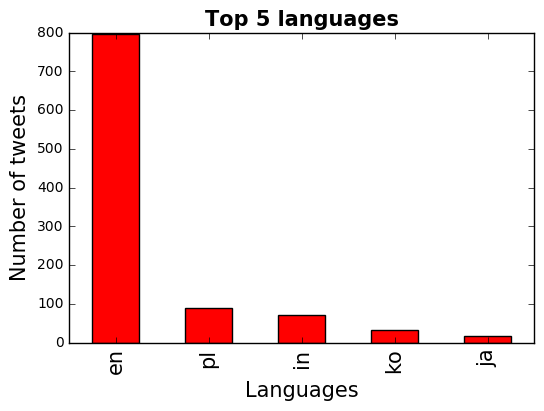

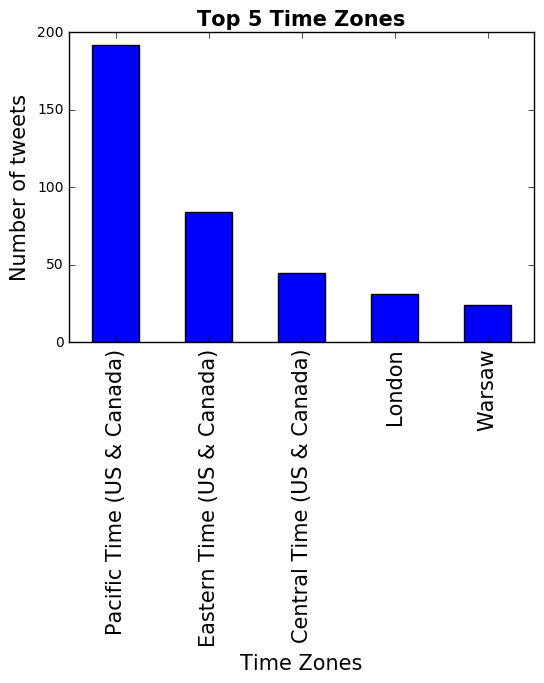

In [28]:
tweets_by_lang = df['lang'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='red')

tweets_by_zone = df['user.time_zone'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Time Zones', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 Time Zones', fontsize=15, fontweight='bold')
tweets_by_zone[:5].plot(ax=ax, kind='bar', color='blue')

plt.show()

# Keyword Search

In [31]:
def word_in_text(word, text):
    word = word.lower()
    text = str(text)
    text = text.lower()
    match = re.search(word, text)
    if match:
        return True
    return False

In [32]:
df['Japan'] = df['text'].apply(lambda tweet: word_in_text('japan', tweet))
df['China'] = df['text'].apply(lambda tweet: word_in_text('china', tweet))
#tweets['US'] = tweets['text'].apply(lambda tweet: word_in_text('united states', tweet))

print(df['Japan'].value_counts()[True])
print(df['China'].value_counts()[True])
#print (tweets['US'].value_counts()[True])

28
29


In [37]:
neighbors = ['Japan', 'China']
tweets_by_neighbors = [df['Japan'].value_counts()[True], df['China'].value_counts()[True]]
tweets_by_neighbors

[28, 29]

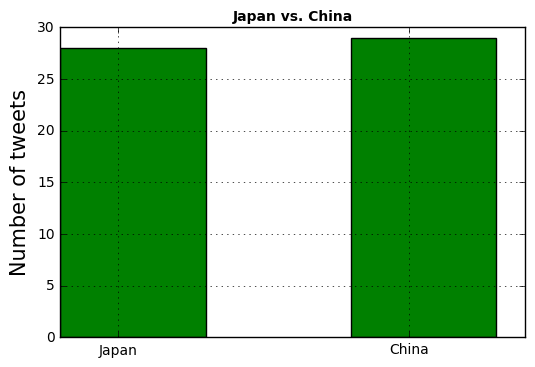

In [153]:
x_pos = list(range(len(neighbors)))
width = 0.5
fig, ax = plt.subplots()
plt.bar(x_pos, tweets_by_neighbors, width, alpha=1, color='g')

# Setting axis labels and ticks
ax.set_ylabel('Number of tweets', fontsize=15)
ax.set_title('Japan vs. China', fontsize=10, fontweight='bold')
ax.set_xticks([p + 0.4 * width for p in x_pos])
ax.set_xticklabels(neighbors)
plt.grid()
plt.show()

# Sentiment Analysis

In [62]:
def clean_tweet(tweet):
# to clean tweet text by removing links, special characters using simple regex statements.
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

In [67]:
def get_tweet_sentiment(tweet):
#to classify sentiment of passed tweet
    analysis = TextBlob(clean_tweet(tweet))  # create TextBlob object of passed tweet text
    
    if analysis.sentiment.polarity > 0:  # set sentiment
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

In [71]:
df['sentiment'] = get_tweet_sentiment(str(df["text"]))

In [80]:
for index, row in df.iterrows():
    df.loc[index, 'sentiment'] = get_tweet_sentiment(str(df.loc[index, "text"]))
    

In [79]:
df.loc[5, "text"]

'@moonlghtway O rok młodsza jestem 🙃🙂'

In [81]:
df

,Unnamed: 0,created_at,id,in_reply_to_status_id,place,coordinates,text,quoted_status.entities.hashtags,favorite_count,retweet_count,user.time_zone,lang,sentiment
0,0,Thu Jun 22 20:32:28 +0000 2017,8.779877e+17,NaN,NaN,NaN,RT @HuntLifeDaily: Live from North Korea... ht...,NaN,0.0,0.0,Central Time (US & Canada),en,positive
1,1,Thu Jun 22 20:32:29 +0000 2017,8.779877e+17,NaN,NaN,NaN,RT @HuntLifeDaily: Live from North Korea... ht...,NaN,0.0,0.0,Central Time (US & Canada),en,positive
2,2,Thu Jun 22 20:32:29 +0000 2017,8.779877e+17,NaN,NaN,NaN,"RT @imjoy_l: In Korea, unlike Japan, moving ag...",[],0.0,0.0,NaN,en,negative
3,3,Thu Jun 22 20:32:29 +0000 2017,8.779877e+17,NaN,NaN,NaN,"RT @BTS_co_id: [Article/Trans] Special Issue, ...",NaN,0.0,0.0,Jakarta,en,positive
4,4,Thu Jun 22 20:32:30 +0000 2017,8.779877e+17,NaN,NaN,NaN,RT @HuntLifeDaily: Live from North Korea... ht...,NaN,0.0,0.0,Central Time (US & Canada),en,positive
5,5,Thu Jun 22 20:32:33 +0000 2017,8.779877e+17,8.779876e+17,NaN,NaN,@moonlghtway O rok młodsza jestem 🙃🙂,NaN,0.0,0.0,Pacific Time (US & Canada),pl,neutral
6,6,Thu Jun 22 20:32:33 +0000 2017,8.779877e+17,NaN,NaN,NaN,RT @jimineamour: Parks I want to explore in ko...,NaN,0.0,0.0,Pacific Time (US & Canada),en,neutral
7,7,Thu Jun 22 20:32:33 +0000 2017,8.779877e+17,NaN,NaN,NaN,RT @ArmsControlWonk: The given place for the e...,[],0.0,0.0,NaN,en,positive
8,8,Thu Jun 22 20:32:33 +0000 2017,8.779877e+17,NaN,NaN,NaN,"Funeral Held for Otto Warmbier, Former North K...",NaN,0.0,0.0,NaN,en,neutral
9,9,Thu Jun 22 20:32:34 +0000 2017,8.779877e+17,NaN,NaN,NaN,korea hhehe https://t.co/KHqDanoTqM,"[{'indices': [0, 10], 'text': 'WonwooAsk'}]",0.0,0.0,Bangkok,in,neutral


In [121]:
# picking positive tweets from tweets
ptweets = df['text'][df['sentiment'] == 'positive']
# percentage of positive tweets
p_percent = 100*len(ptweets)/len(df)
print("Positive tweets percentage: {} %".format(p_percent))

# picking negative tweets from tweets
ntweets = df['text'][df['sentiment'] == 'negative']
# percentage of negative tweets
n_percent = 100*len(ntweets)/len(df)
print("Negative tweets percentage: {} %".format(n_percent))

# percentage of neutral tweets
xtweets = df['text'][df['sentiment'] == 'neutral']
# percentage of negative tweets
x_percent = 100*len(xtweets)/len(df)
print("Neutral tweets percentage: {} %".format(x_percent))
    
# printing first 5 positive tweets
print("\n\nPositive tweets: \n{}%".format(ptweets[:10]))
# printing first 5 negative tweets
print("\n\nNegative tweets: \n{}%.".format(ntweets[:10]))    
    

Positive tweets percentage: 23.518687329079306 %
Negative tweets percentage: 14.402917046490428 %
Neutral tweets percentage: 62.078395624430264 %


Positive tweets: 
0     RT @HuntLifeDaily: Live from North Korea... ht...
1     RT @HuntLifeDaily: Live from North Korea... ht...
3     RT @BTS_co_id: [Article/Trans] Special Issue, ...
4     RT @HuntLifeDaily: Live from North Korea... ht...
7     RT @ArmsControlWonk: The given place for the e...
13    RT @btsanalytics: [!] TOP COUNTRIES → where @B...
14    RT @iDangs_: So many things happening but my m...
15    RT @ManuPinkVIP: btw it's amazing how a song w...
28    RT @ArabRapMonster: [تابع/#ترجمه_RM] \nمقابلة ...
34    RT @btsanalytics: [!] TOP COUNTRIES → where @B...
Name: text, dtype: object%


Negative tweets: 
2     RT @imjoy_l: In Korea, unlike Japan, moving ag...
16    So sad.  God please bless his soul. 😇😇 https:/...
18    Sorry w moonbin orang korea https://t.co/dYvya...
20    RT @chelseahandler: Trump said China has faile...
39 

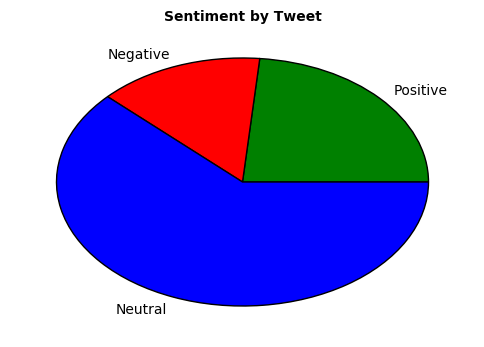

In [141]:
label = ['Positive', 'Negative', 'Neutral']

plt.figure()
plt.pie([p_percent, n_percent, x_percent], labels=label, colors=['green', 'red', 'blue'])
plt.title('Sentiment by Tweet', fontsize=10, fontweight='bold')
plt.show()